# Step:1 Loading The Data and Visualizing the Dataset

100%|██████████| 170M/170M [00:01<00:00, 88.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Training Set category counts:
plane: 5000
car: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


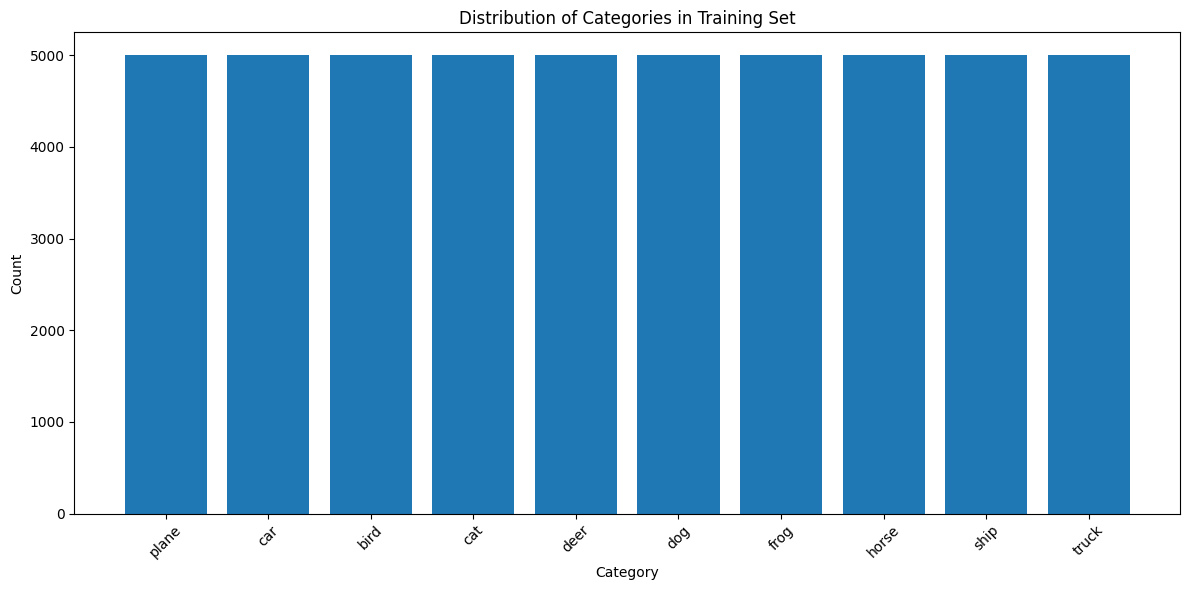


Test Set category counts:
plane: 1000
car: 1000
bird: 1000
cat: 1000
deer: 1000
dog: 1000
frog: 1000
horse: 1000
ship: 1000
truck: 1000


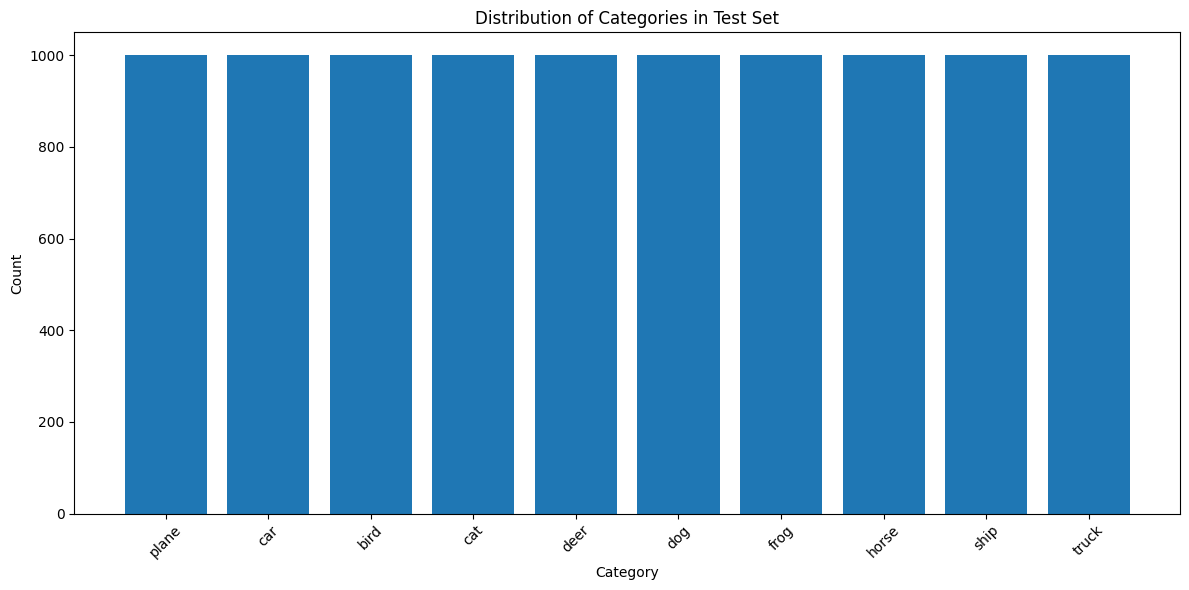


Total counts:
Training set: 50000 images
Test set: 10000 images
Total: 60000 images


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from collections import Counter
import matplotlib.pyplot as plt

# Define the classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Function to count labels and plot distribution
def analyze_dataset(dataset, title):
    labels = [dataset[i][1] for i in range(len(dataset))]
    label_counts = Counter(labels)

    print(f"\n{title} category counts:")
    for i, class_name in enumerate(classes):
        count = label_counts[i]
        print(f"{class_name}: {count}")

    plt.figure(figsize=(12, 6))
    plt.bar(classes, [label_counts[i] for i in range(10)])
    plt.title(f'Distribution of Categories in {title}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Load the entire training dataset without any transformations
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)

# Load the entire test dataset without any transformations
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

# Analyze training set
analyze_dataset(trainset, "Training Set")

# Analyze test set
analyze_dataset(testset, "Test Set")

# Calculate and print total counts
print("\nTotal counts:")
print(f"Training set: {len(trainset)} images")
print(f"Test set: {len(testset)} images")
print(f"Total: {len(trainset) + len(testset)} images")

# Step 2: Training the Basic CNN Model and Finding the Accuracy

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Preprocessing: define transformations
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load training and test datasets with transformations
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Define a simple CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

# Instantiate the model, define loss function and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, trainloader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            if i % 100 == 99:  # Print every 100 mini-batches
                print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 100:.3f}")
                running_loss = 0.0
    print("Finished Training")

# Train the model
train_model(model, trainloader, criterion, optimizer)

# Evaluation on the test set
def evaluate_model(model, testloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

# Evaluate the model
evaluate_model(model, testloader)


Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch 100] loss: 2.078
[Epoch 1, Batch 200] loss: 1.812
[Epoch 1, Batch 300] loss: 1.679
[Epoch 1, Batch 400] loss: 1.590
[Epoch 1, Batch 500] loss: 1.544
[Epoch 1, Batch 600] loss: 1.486
[Epoch 1, Batch 700] loss: 1.437
[Epoch 2, Batch 100] loss: 1.370
[Epoch 2, Batch 200] loss: 1.324
[Epoch 2, Batch 300] loss: 1.308
[Epoch 2, Batch 400] loss: 1.258
[Epoch 2, Batch 500] loss: 1.228
[Epoch 2, Batch 600] loss: 1.204
[Epoch 2, Batch 700] loss: 1.197
[Epoch 3, Batch 100] loss: 1.145
[Epoch 3, Batch 200] loss: 1.124
[Epoch 3, Batch 300] loss: 1.077
[Epoch 3, Batch 400] loss: 1.113
[Epoch 3, Batch 500] loss: 1.099
[Epoch 3, Batch 600] loss: 1.064
[Epoch 3, Batch 700] loss: 1.042
[Epoch 4, Batch 100] loss: 1.047
[Epoch 4, Batch 200] loss: 1.024
[Epoch 4, Batch 300] loss: 1.018
[Epoch 4, Batch 400] loss: 0.974
[Epoch 4, Batch 500] loss: 0.994
[Epoch 4, Batch 600] loss: 0.984
[Epoch 4, Batch 700] loss: 0.980


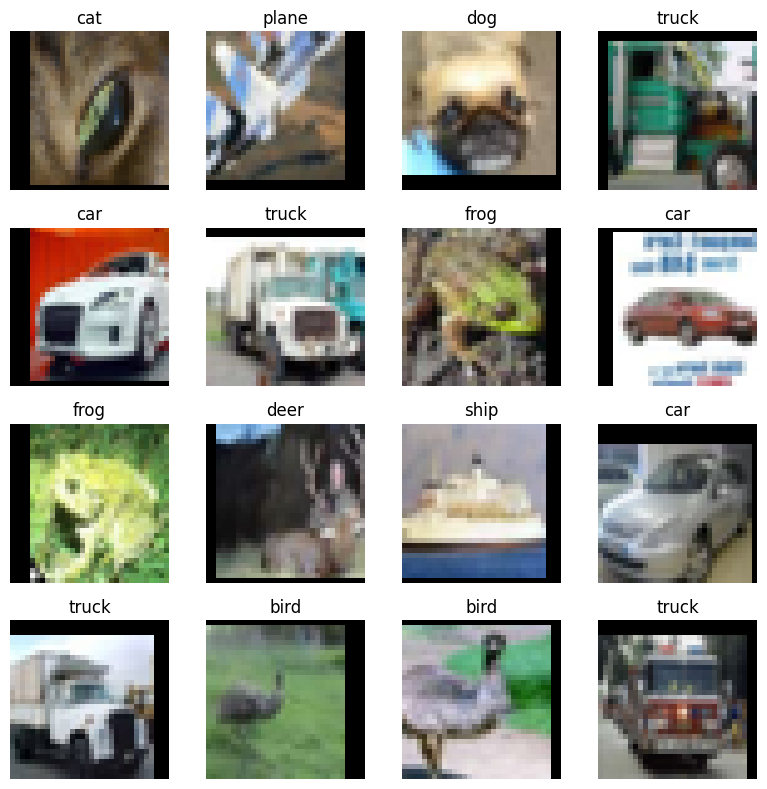

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize a batch of images with labels
def show_batch(data_loader):
    images, labels = next(iter(data_loader))  # Get a batch of images and labels
    images = images[:16]  # Show only the first 16 images for a 4x4 grid
    labels = labels[:16]

    # Unnormalize the images for display
    images = images * torch.tensor((0.2023, 0.1994, 0.2010)).view(3, 1, 1) + torch.tensor((0.4914, 0.4822, 0.4465)).view(3, 1, 1)

    grid_size = 4
    plt.figure(figsize=(8, 8))
    for i in range(grid_size * grid_size):
        plt.subplot(grid_size, grid_size, i + 1)
        img = images[i].permute(1, 2, 0).numpy()  # Reorder dimensions for plt.imshow
        plt.imshow(np.clip(img, 0, 1))  # Clip values to ensure they're in [0, 1] range
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Display a batch of training images
show_batch(trainloader)

# Step-2 Defining the Models ResNet18, AlexNet, MobileNetV2 and Visualizing the Models and finding there Accuracies

Using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/10
----------
train Loss: 1.6085 Acc: 0.4045
val Loss: 1.3839 Acc: 0.5083

Epoch 2/10
----------
train Loss: 1.1871 Acc: 0.5730
val Loss: 1.0907 Acc: 0.6131

Epoch 3/10
----------
train Loss: 0.9474 Acc: 0.6613
val Loss: 0.9175 Acc: 0.6858

Epoch 4/10
----------
train Loss: 0.7958 Acc: 0.7165
val Loss: 1.0003 Acc: 0.6679

Epoch 5/10
----------
train Loss: 0.6986 Acc: 0.7553
val Loss: 0.7772 Acc: 0.7204

Epoch 6/10
----------
train Loss: 0.6259 Acc: 0.7829
val Loss: 0.7013 Acc: 0.7597

Epoch 7/10
----------
train Loss: 0.5683 Acc: 0.8029
val Loss: 0.6630 Acc: 0.7761

Epoch 8/10
----------
train Loss: 0.5165 Acc: 0.8190
val Loss: 0.6300 Acc: 0.7851

Epoch 9/10
----------
train Loss: 0.4827 Acc: 0.8292
val Loss: 0.6218 Acc: 0.7935

Epoch 10/10
----------
train Loss: 0.4361 Acc: 0.8473
val Loss: 0.5310 Acc: 0.8202

ResNet18 Test Accuracy: 82.79%
Epoch 1/10
----------
train Loss: 2.1932 Acc: 0.1701
val Loss: 1.9363 Acc: 0.2701

Epoch 2/10
----------
train Loss: 1.7914 Acc: 0.3241
va

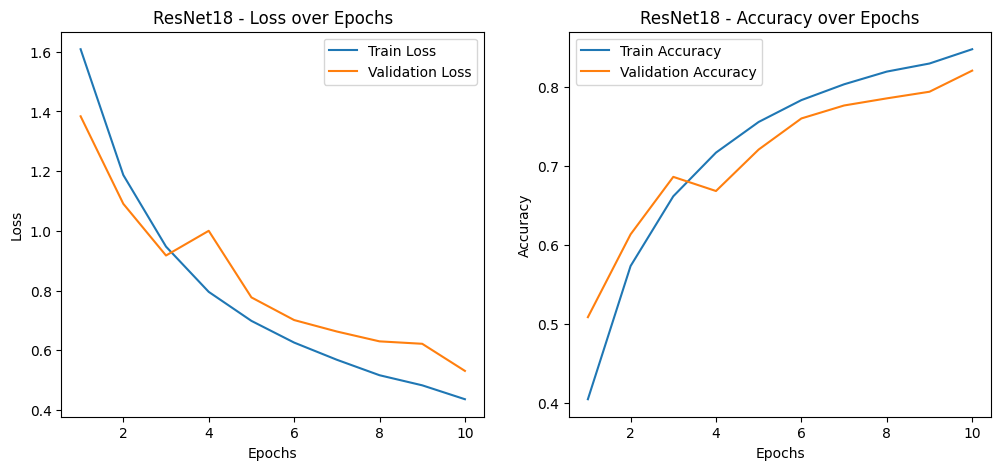

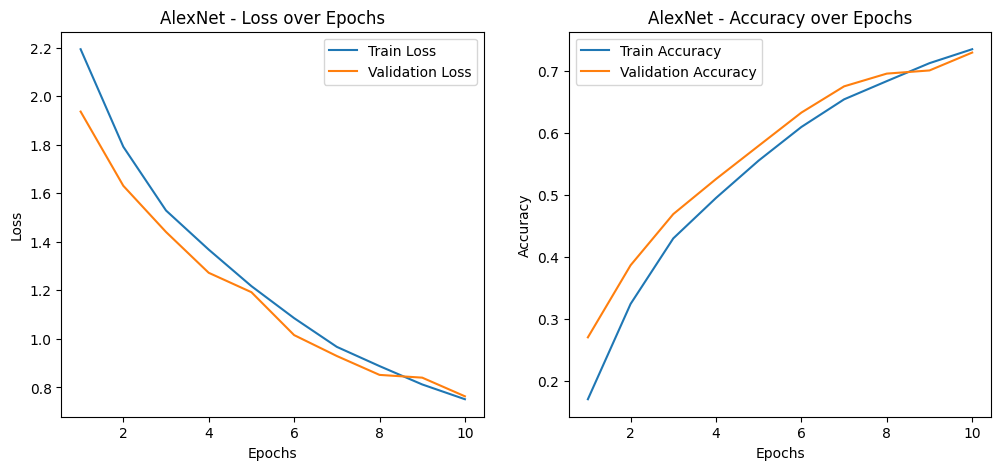

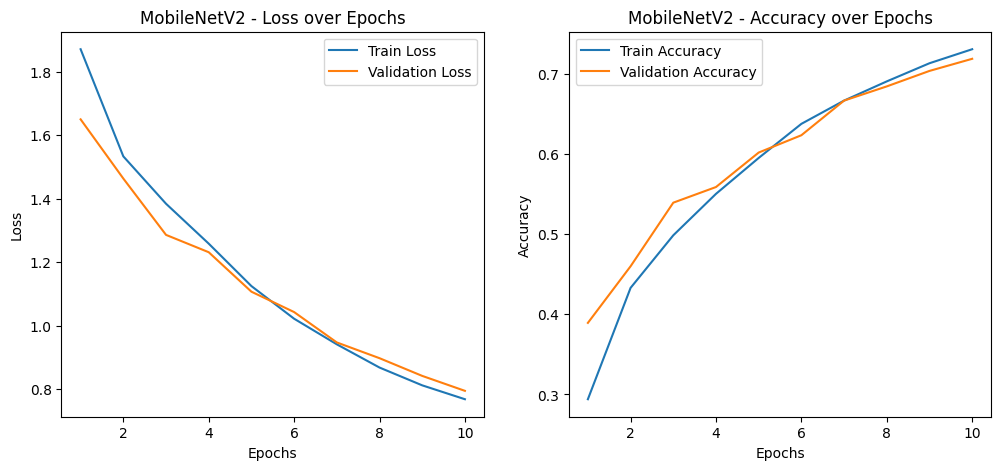


Final Test Accuracies:
ResNet18: 82.79%
AlexNet: 75.27%
MobileNetV2: 73.82%


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision.models import resnet18, mobilenet_v2

# Check if CUDA is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define transforms
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Load CIFAR-10 dataset
full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

# Split training set into train and validation
train_size = int(0.8 * len(full_trainset))
val_size = len(full_trainset) - train_size
trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=100, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Define models
def create_resnet18(num_classes=10):
    model = resnet18(pretrained=False)
    model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
    model.maxpool = nn.Identity()
    model.fc = nn.Linear(512, num_classes)
    return model

def create_alexnet(num_classes=10):
    model = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(64, 192, kernel_size=3, padding=2),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(192, 384, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(256, 256, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten(),
        nn.Linear(256 * 4 * 4, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Dropout(),
        nn.Linear(4096, num_classes),
    )
    return model

def create_mobilenetv2(num_classes=10):
    model = mobilenet_v2(pretrained=False)
    model.features[0][0] = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1, bias=False)
    model.classifier[1] = nn.Linear(model.last_channel, num_classes)
    return model

# Training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    model.to(device)
    best_acc = 0.0
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = trainloader
            else:
                model.eval()
                dataloader = valloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                torch.save(model.state_dict(), f'best_{type(model).__name__}.pth')

        print()

    return model, history

# Evaluation function
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Main experiment function
def run_experiment(model_creator, model_name, lr=0.01, momentum=0.9, weight_decay=5e-4):
    model = model_creator()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

    model, history = train_model(model, criterion, optimizer, scheduler)

    # Load best model
    model.load_state_dict(torch.load(f'best_{type(model).__name__}.pth', weights_only=True))

    # Evaluate on test set
    test_acc = evaluate_model(model, testloader)
    print(f'{model_name} Test Accuracy: {test_acc:.2f}%')

    return test_acc, history

# Run experiments and collect data for each model
resnet18_acc, resnet18_history = run_experiment(create_resnet18, 'ResNet18')
alexnet_acc, alexnet_history = run_experiment(create_alexnet, 'AlexNet')
mobilenetv2_acc, mobilenetv2_history = run_experiment(create_mobilenetv2, 'MobileNetV2')

# Visualize results
def plot_history(history, model_name):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Train Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss over Epochs')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], label='Train Accuracy')
    plt.plot(epochs, history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy over Epochs')
    plt.legend()

    plt.show()

# Plot results for each model
plot_history(resnet18_history, 'ResNet18')
plot_history(alexnet_history, 'AlexNet')
plot_history(mobilenetv2_history, 'MobileNetV2')

# Print final test accuracies
print("\nFinal Test Accuracies:")
print(f"ResNet18: {resnet18_acc:.2f}%")
print(f"AlexNet: {alexnet_acc:.2f}%")
print(f"MobileNetV2: {mobilenetv2_acc:.2f}%")

# Step:3 Hyper-parameter Tuning and Finding the Best Hyper-parameter


Testing configuration: {'augmentation': 'basic', 'learning_rate': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0005}


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Files already downloaded and verified
Epoch 1/10
----------
train Loss: 1.9530 Acc: 0.2747
val Loss: 1.7188 Acc: 0.3649

Epoch 2/10
----------
train Loss: 1.6246 Acc: 0.3955
val Loss: 1.5405 Acc: 0.4233

Epoch 3/10
----------
train Loss: 1.4824 Acc: 0.4489
val Loss: 1.4292 Acc: 0.4667

Epoch 4/10
----------
train Loss: 1.3793 Acc: 0.4919
val Loss: 1.3625 Acc: 0.5034

Epoch 5/10
----------
train Loss: 1.3017 Acc: 0.5249
val Loss: 1.2819 Acc: 0.5305

Epoch 6/10
----------
train Loss: 1.2396 Acc: 0.5498
val Loss: 1.2383 Acc: 0.5485

Epoch 7/10
----------
train Loss: 1.1959 Acc: 0.5656
val Loss: 1.2120 Acc: 0.5599

Epoch 8/10
----------
train Loss: 1.1630 Acc: 0.5796
val Loss: 1.1809 Acc: 0.5771

Epoch 9/10
----------
train Loss: 1.1468 Acc: 0.5822
val Loss: 1.1623 Acc: 0.5762

Epoch 10/10
----------
train Loss: 1.1349 Acc: 0.5885
val Loss: 1.1572 Acc: 0.5787


Testing configuration: {'augmentation': 'basic', 'learning_rate': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0001}
Files already

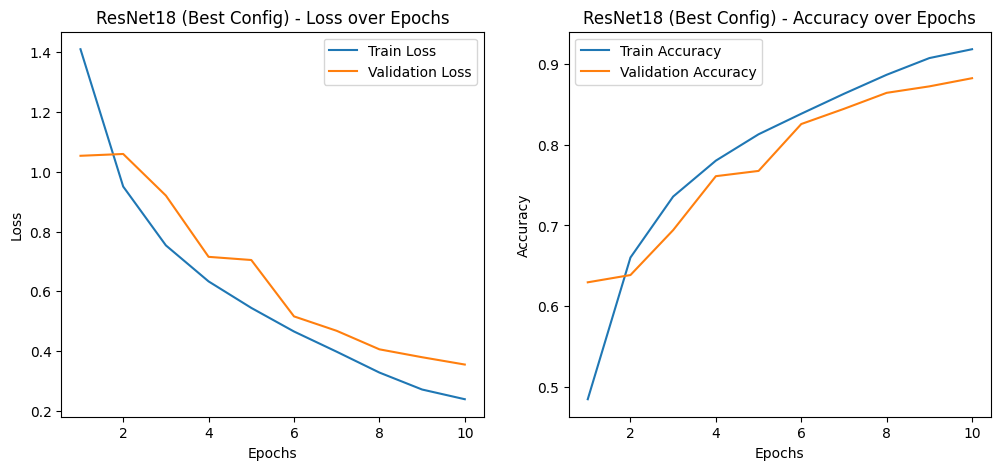


Testing configuration: {'dropout': 0.5, 'learning_rate': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0005}
Files already downloaded and verified
Epoch 1/10
----------
train Loss: 2.3022 Acc: 0.1035
val Loss: 2.3016 Acc: 0.1003

Epoch 2/10
----------
train Loss: 2.3009 Acc: 0.1233
val Loss: 2.2995 Acc: 0.1269

Epoch 3/10
----------
train Loss: 2.2976 Acc: 0.1346
val Loss: 2.2924 Acc: 0.1876

Epoch 4/10
----------
train Loss: 2.2751 Acc: 0.1723
val Loss: 2.2182 Acc: 0.1981

Epoch 5/10
----------
train Loss: 2.1357 Acc: 0.2114
val Loss: 2.0508 Acc: 0.2359

Epoch 6/10
----------
train Loss: 2.0415 Acc: 0.2345
val Loss: 2.0025 Acc: 0.2604

Epoch 7/10
----------
train Loss: 2.0046 Acc: 0.2472
val Loss: 1.9782 Acc: 0.2601

Epoch 8/10
----------
train Loss: 1.9801 Acc: 0.2562
val Loss: 1.9561 Acc: 0.2704

Epoch 9/10
----------
train Loss: 1.9639 Acc: 0.2652
val Loss: 1.9388 Acc: 0.2840

Epoch 10/10
----------
train Loss: 1.9539 Acc: 0.2693
val Loss: 1.9366 Acc: 0.2792


Testing configuration

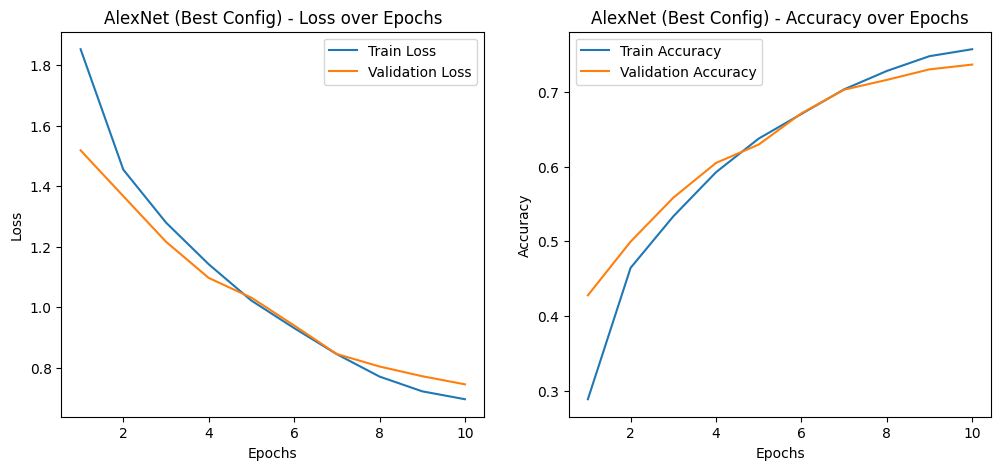


Testing configuration: {'augmentation': 'basic', 'learning_rate': 0.001, 'optimizer': 'SGD', 'weight_decay': 0.0005}
Files already downloaded and verified
Epoch 1/10
----------
train Loss: 2.1393 Acc: 0.1769
val Loss: 1.9214 Acc: 0.2588

Epoch 2/10
----------
train Loss: 1.8211 Acc: 0.2936
val Loss: 1.7308 Acc: 0.3358

Epoch 3/10
----------
train Loss: 1.6771 Acc: 0.3644
val Loss: 1.6144 Acc: 0.3986

Epoch 4/10
----------
train Loss: 1.5858 Acc: 0.4066
val Loss: 1.5398 Acc: 0.4263

Epoch 5/10
----------
train Loss: 1.5231 Acc: 0.4339
val Loss: 1.4846 Acc: 0.4483

Epoch 6/10
----------
train Loss: 1.4690 Acc: 0.4577
val Loss: 1.4521 Acc: 0.4635

Epoch 7/10
----------
train Loss: 1.4231 Acc: 0.4742
val Loss: 1.4258 Acc: 0.4739

Epoch 8/10
----------
train Loss: 1.4008 Acc: 0.4831
val Loss: 1.3944 Acc: 0.4875

Epoch 9/10
----------
train Loss: 1.3871 Acc: 0.4869
val Loss: 1.3854 Acc: 0.4928

Epoch 10/10
----------
train Loss: 1.3766 Acc: 0.4939
val Loss: 1.3846 Acc: 0.4871


Testing conf

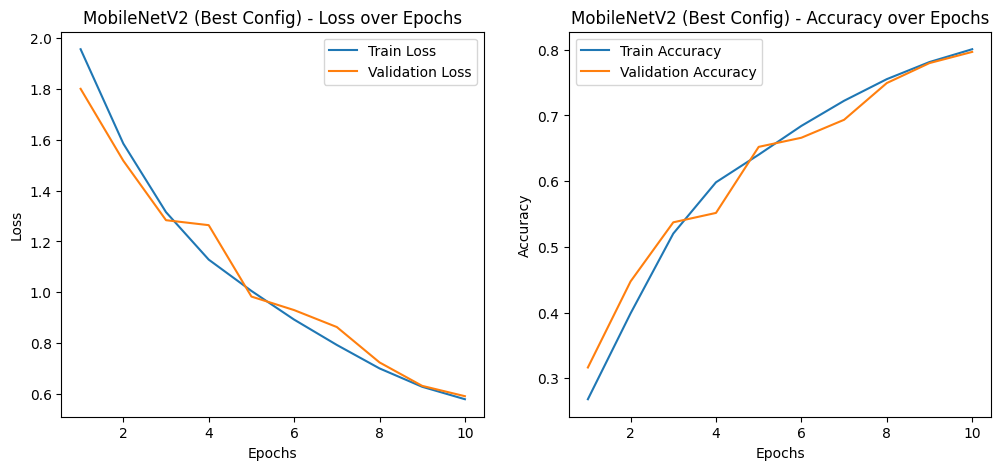


Summary of Best Hyperparameters:
ResNet18: {'augmentation': 'basic', 'learning_rate': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0001}, Best Val Accuracy: 0.88%
AlexNet: {'dropout': 0.3, 'learning_rate': 0.001, 'optimizer': 'Adam', 'weight_decay': 0.0005}, Best Val Accuracy: 0.74%
MobileNetV2: {'augmentation': 'basic', 'learning_rate': 0.01, 'optimizer': 'Adam', 'weight_decay': 0.0001}, Best Val Accuracy: 0.80%


In [7]:
from sklearn.model_selection import ParameterGrid

# Define hyperparameter grids for each model
resnet18_grid = ParameterGrid({
    'optimizer': ['SGD', 'Adam'],
    'learning_rate': [0.001, 0.01],
    'weight_decay': [5e-4, 1e-4],
    'augmentation': ['basic', 'advanced']
})

alexnet_grid = ParameterGrid({
    'optimizer': ['SGD', 'Adam'],
    'learning_rate': [0.001, 0.01],
    'weight_decay': [5e-4, 1e-4],
    'dropout': [0.5, 0.3]
})

mobilenetv2_grid = ParameterGrid({
    'optimizer': ['SGD', 'Adam'],
    'learning_rate': [0.001, 0.01],
    'weight_decay': [5e-4, 1e-4],
    'augmentation': ['basic', 'advanced']
})

# Define a function to perform training and validation with different hyperparameters
def run_hyperparameter_tuning(model_creator, model_name, param_grid):
    best_acc = 0.0
    best_params = None
    best_history = None

    # Loop over each parameter combination
    for params in param_grid:
        print(f"\nTesting configuration: {params}")

        # Create model
        model = model_creator()

        # Configure optimizer
        if params['optimizer'] == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=params['learning_rate'], momentum=0.9, weight_decay=params['weight_decay'])
        elif params['optimizer'] == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'], weight_decay=params['weight_decay'])

        # Use Cosine Annealing scheduler for all experiments
        scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)

        # Define augmentations
        if params.get('augmentation') == 'advanced':
            transform = transforms.Compose([
                transforms.RandomCrop(32, padding=4),
                transforms.RandomHorizontalFlip(),
                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])
        else:  # Basic augmentation
            transform = transforms.Compose([
                transforms.RandomCrop(32, padding=4),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

        # Load datasets with the current augmentation
        trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
        val_size = int(0.2 * len(trainset))
        train_size = len(trainset) - val_size
        trainset, valset = torch.utils.data.random_split(trainset, [train_size, val_size])

        trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
        valloader = torch.utils.data.DataLoader(valset, batch_size=100, shuffle=False, num_workers=2)

        # Train the model with the current configuration
        model, history = train_model(model, nn.CrossEntropyLoss(), optimizer, scheduler)

        # Get validation accuracy of the trained model
        val_acc = history['val_acc'][-1]

        # Update best model if current model is better
        if val_acc > best_acc:
            best_acc = val_acc
            best_params = params
            best_history = history

    # Visualize the best configuration's training and validation curves
    print(f"\nBest configuration for {model_name}: {best_params} with validation accuracy: {best_acc:.2f}%")
    plot_history(best_history, f'{model_name} (Best Config)')

    return best_params, best_acc

# Run tuning for each model and collect results
resnet18_best_params, resnet18_best_acc = run_hyperparameter_tuning(create_resnet18, 'ResNet18', resnet18_grid)
alexnet_best_params, alexnet_best_acc = run_hyperparameter_tuning(create_alexnet, 'AlexNet', alexnet_grid)
mobilenetv2_best_params, mobilenetv2_best_acc = run_hyperparameter_tuning(create_mobilenetv2, 'MobileNetV2', mobilenetv2_grid)

print("\nSummary of Best Hyperparameters:")
print(f"ResNet18: {resnet18_best_params}, Best Val Accuracy: {resnet18_best_acc:.2f}%")
print(f"AlexNet: {alexnet_best_params}, Best Val Accuracy: {alexnet_best_acc:.2f}%")
print(f"MobileNetV2: {mobilenetv2_best_params}, Best Val Accuracy: {mobilenetv2_best_acc:.2f}%")


# Conclusion :By comparing different Architectures like ResNet18, AlexNet, MobileNetV2, and by comparing their Accuracy I can conclude that ResNet18 have the Best accuracy among the remaining Architectures before and after the Hyper-parameter Tunning.